# Artificial Neural Network

### Importing the libraries

In [29]:
import numpy as np, pandas as pd, tensorflow as tf, matplotlib.pyplot as plt

In [30]:
tf.__version__

'2.5.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [31]:
dataset = pd.read_excel('Folds5x2_pp.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Part 2 - Building the ANN

### Initializing the ANN

In [33]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [34]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [35]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [36]:
ann.add(tf.keras.layers.Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

In [37]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Training the ANN model on the Training set

In [38]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
240/240 [==============================] - 1s 1ms/step - loss: 53609.4648
Epoch 2/100
240/240 [==============================] - 0s 1ms/step - loss: 421.1524
Epoch 3/100
240/240 [==============================] - 0s 1ms/step - loss: 391.5149
Epoch 4/100
240/240 [==============================] - 0s 1ms/step - loss: 359.4312
Epoch 5/100
240/240 [==============================] - 0s 1ms/step - loss: 327.9497
Epoch 6/100
240/240 [==============================] - 0s 1ms/step - loss: 296.5966
Epoch 7/100
240/240 [==============================] - 0s 1ms/step - loss: 263.2312
Epoch 8/100
240/240 [==============================] - 0s 1ms/step - loss: 229.1262
Epoch 9/100
240/240 [==============================] - 0s 1ms/step - loss: 196.0703
Epoch 10/100
240/240 [==============================] - 0s 1ms/step - loss: 165.3476
Epoch 11/100
240/240 [==============================] - 0s 1ms/step - loss: 136.4717
Epoch 12/100
240/240 [==============================] - 0s 1ms/step - lo

## Predicting the results of the Test set

In [39]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[428.23 431.23]
 [459.32 460.01]
 [462.84 461.14]
 ...
 [470.07 473.26]
 [436.87 438.  ]
 [456.12 463.28]]


In [40]:
y_pred.shape

(1914, 1)

In [41]:
y_test = y_test.reshape(len(y_test), 1)
y_test.shape

(1914, 1)

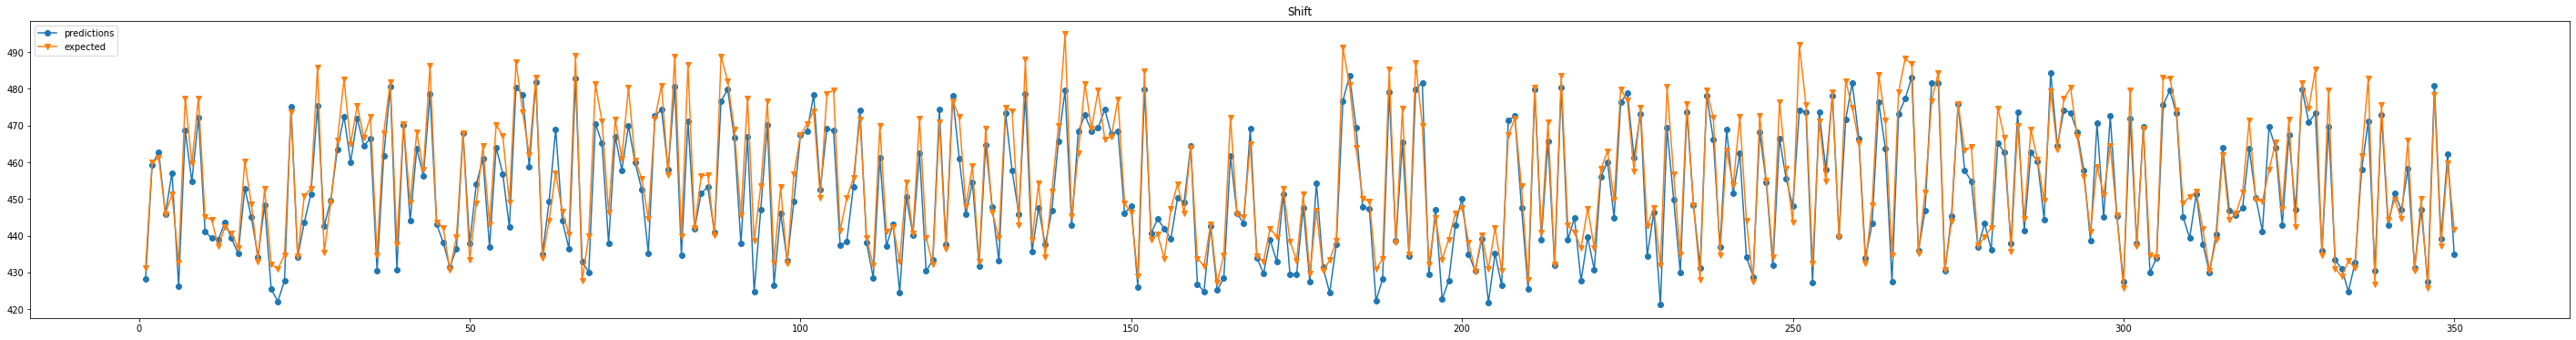

In [42]:
epochs = [i for i in range(1, 1915)]

fig = plt.figure(figsize=(50, 6))
plt.title('Shift')
plt.plot(epochs[0:350], y_pred[0:350], label='predictions', marker='o')
plt.plot(epochs[0:350], y_test[0:350], label='expected', marker='v')
plt.legend(loc='upper left')
plt.show()

In [43]:
shifts = []
for prediction, expected in zip(y_pred, y_test):
  shifts.append(np.abs(prediction-expected))
print(f"len check:\nprediction shape: {y_pred.shape}\nexpected shape: {y_test.shape}\nshifts shape: {np.asarray(shifts).shape}")

len check:
prediction shape: (1914, 1)
expected shape: (1914, 1)
shifts shape: (1914, 1)


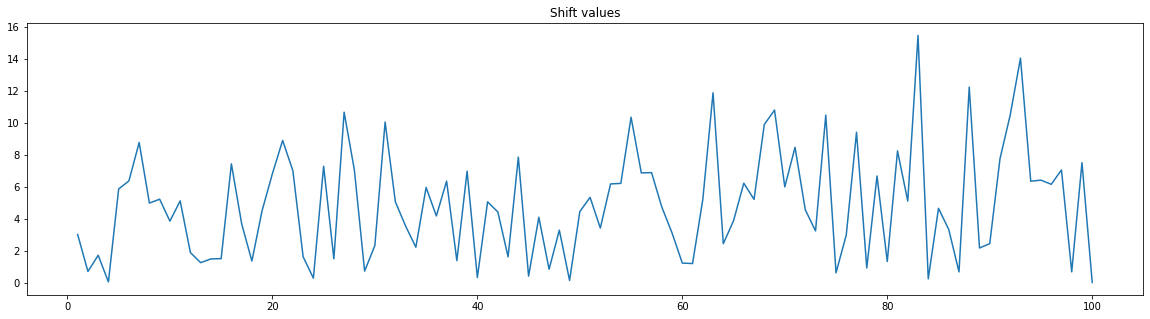

In [44]:
fig = plt.figure(figsize=(20, 5))
plt.title('Shift values')
plt.plot(epochs[0:100], shifts[0:100])
plt.show()